In [365]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
import openTSNE
from openTSNE import TSNE
from FCM import FCM
# import pyclustertend

In [366]:
data = pd.read_csv('../data/wine-clustering.csv')
cols = ['Proline']
data = data.drop(columns=cols)

original = data.copy()
# print(original)

data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93
...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62


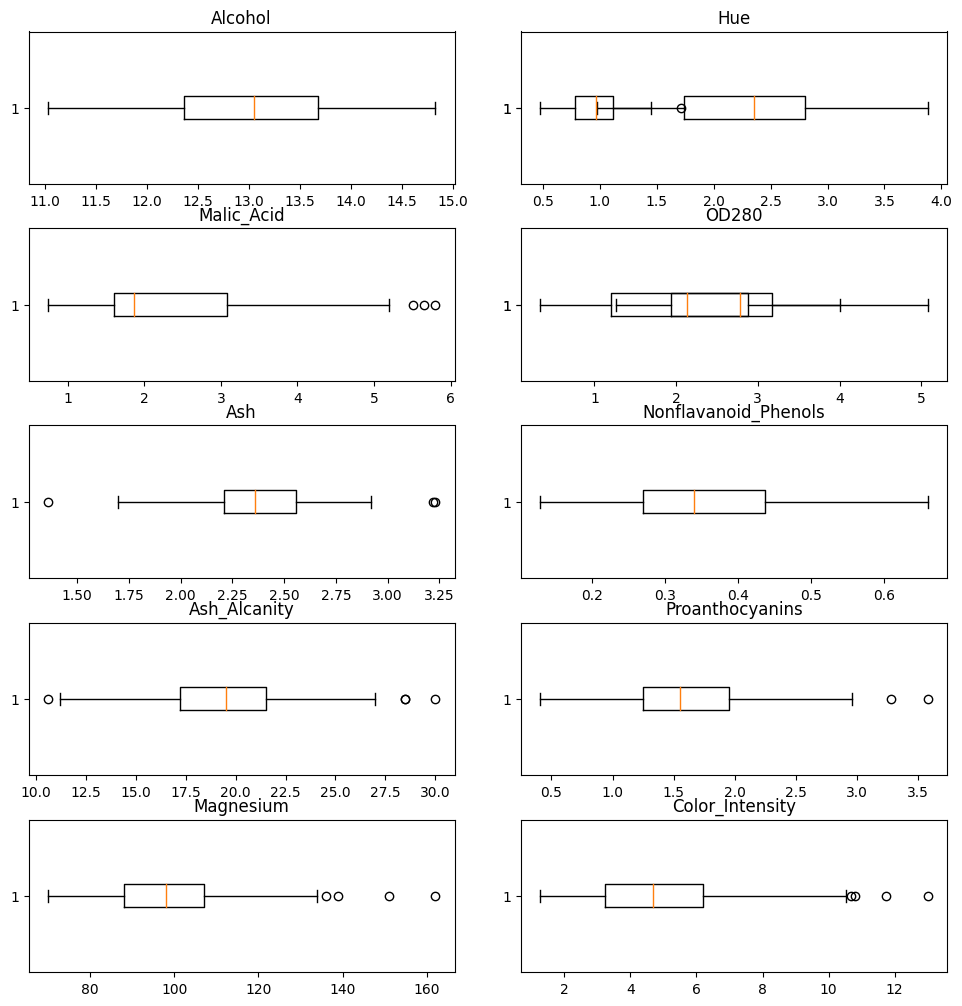

In [367]:
fig, axes = plt.subplots(5, 2, figsize=(10, 10))
fig.tight_layout()

i, j = 0, 0
for (name, col) in data.iteritems():
    if i == 5:
        i, j = 0, 1

    bp = axes[i, j].boxplot(col, vert=0)
    axes[i, j].set_title(name)
    i += 1

# plt.savefig('boxplots.png')
plt.show()

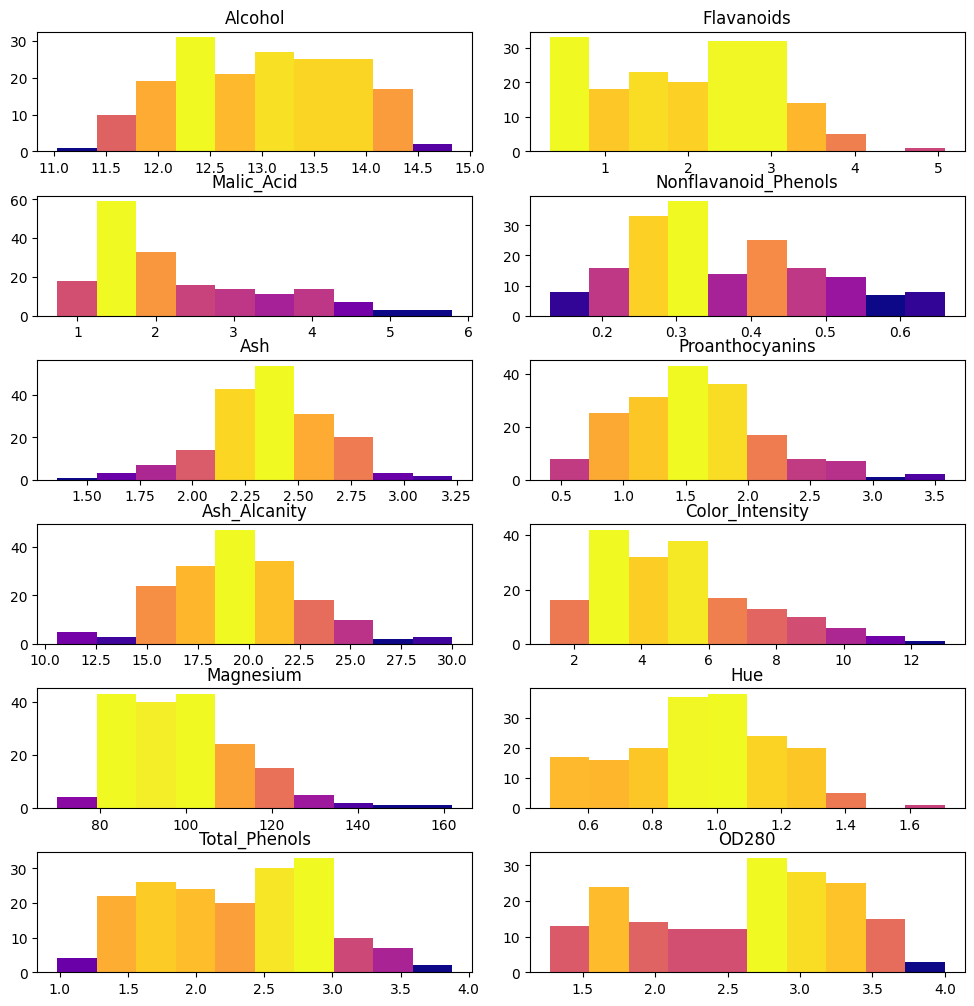

In [368]:
fig, axes = plt.subplots(6, 2, figsize=(10, 10))
fig.tight_layout()

i, j = 0, 0
for (name, col) in data.iteritems():
    if i == 6:
        i, j = 0, 1

    N, bins, patches = axes[i, j].hist(col)

    fracs = ((N**(1 / 5)) / N.max())
    norm = colors.Normalize(fracs.min(), fracs.max())

    for thisfrac, thispatch in zip(fracs, patches):
        color = plt.cm.plasma(norm(thisfrac))
        thispatch.set_facecolor(color)

    axes[i, j].set_title(name)
    i += 1

plt.savefig('histograms.png')
plt.show()

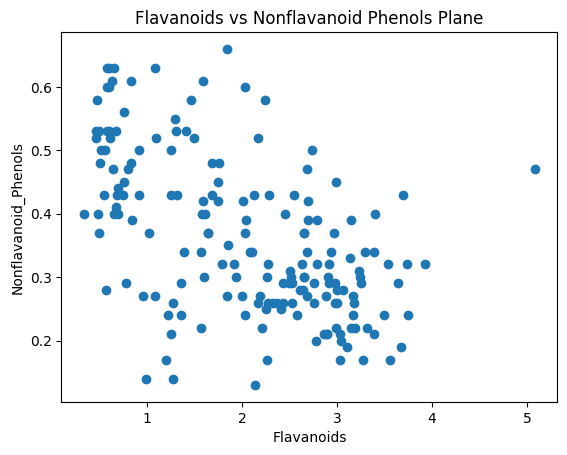

In [369]:
plt.scatter(data['Flavanoids'], data['Nonflavanoid_Phenols'])
ax = plt.gca()
ax.ticklabel_format(useOffset=False)
ax.set_xlabel("Flavanoids")
ax.set_ylabel("Nonflavanoid_Phenols")
plt.title('Flavanoids vs Nonflavanoid Phenols Plane')
# plt.savefig('flavanoids_nonflav_plot.png')
plt.show()

In [370]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
data = pd.DataFrame(data)
data

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059
...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205


(178, 2)


/var/folders/z5/b9yhk9k12l31fz69p714mhyw0000gn/T/ipykernel_64468/1261226842.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap=colors)


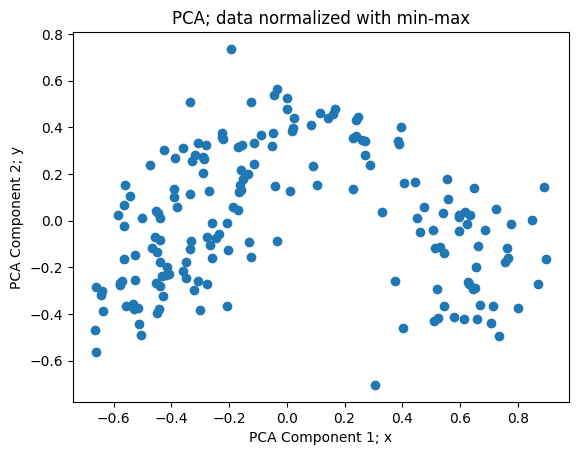

In [371]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data)

print(X_pca.shape)

colors = ListedColormap(['#ff0000', '#00ff00', '#1700ff'])

plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap=colors)
ax = plt.gca()
ax.ticklabel_format(useOffset=False)
ax.set_xlabel("PCA Component 1; x")
ax.set_ylabel("PCA Component 2; y")
plt.title("PCA; data normalized with min-max")
plt.savefig('pca1_test.png')
plt.show()

(178, 2)


/var/folders/z5/b9yhk9k12l31fz69p714mhyw0000gn/T/ipykernel_64468/561822907.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_tsne[:, 0], X_tsne[:, 1], cmap=colors)


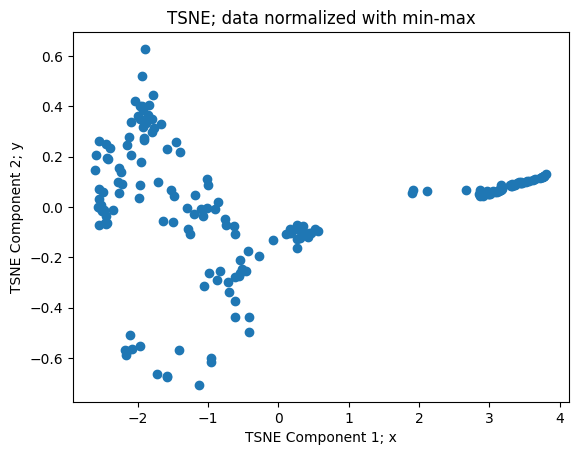

In [372]:
affinities = openTSNE.affinity.Multiscale(
    data.to_numpy(),
    perplexities=[5, 8, 15, 20],
    metric="cosine",
    n_jobs=8,
    random_state=3
)

init = openTSNE.initialization.pca(data.to_numpy(), random_state=42)

X_tsne = openTSNE.TSNE(n_jobs=8, exaggeration=4).fit(
    affinities=affinities,
    initialization=init
)

print(X_tsne.shape)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], cmap=colors)
ax = plt.gca()
ax.ticklabel_format(useOffset=False)
ax.set_xlabel("TSNE Component 1; x")
ax.set_ylabel("TSNE Component 2; y")
plt.title("TSNE; data normalized with min-max")
plt.savefig('tsne1_plot.png')
plt.show()

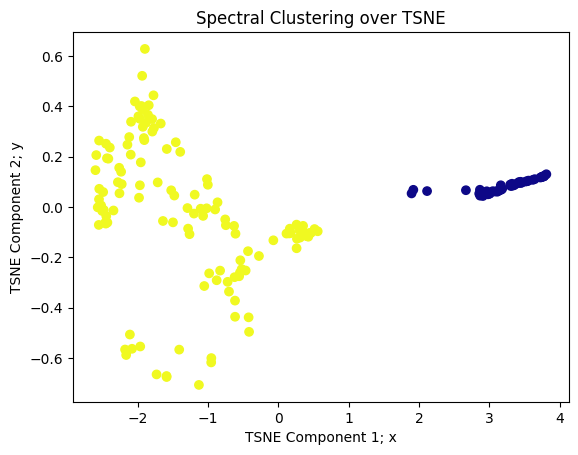

In [374]:
spectral = SpectralClustering(n_clusters=2, assign_labels='discretize',random_state=0).fit(X_tsne)

result = spectral.labels_
X_tsne_later = X_tsne

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=result, cmap='plasma')
ax = plt.gca()
ax.ticklabel_format(useOffset=False)
ax.set_xlabel("TSNE Component 1; x")
ax.set_ylabel("TSNE Component 2; y")
plt.title("Spectral Clustering over TSNE")
plt.savefig('spectral_tsne_plot.png')
plt.show()

In [375]:
c1, c2 = [], []
for i in range(len(data)):
    if result[i] == 0:
        c1.append(i)
    else:
        c2.append(i)

big_cluster = []
small_cluster = []
if len(c1) > len(c2):
    big_cluster = c1
    small_cluster = c2
else:
    big_cluster = c2
    small_cluster = c1

large = data.iloc[big_cluster]
small = data.iloc[small_cluster]

c3 = []
for i in range(len(small)):
    c3.append(2)

large

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059
...,...,...,...,...,...,...,...,...,...,...,...,...
125,0.273684,0.280632,0.433155,0.536082,0.163043,0.558621,0.487342,0.452830,0.296530,0.126280,0.308943,0.736264
126,0.368421,0.156126,0.497326,0.561856,0.173913,0.606897,0.592827,0.490566,0.429022,0.226962,0.170732,0.575092
127,0.200000,0.274704,0.759358,0.922680,0.239130,0.396552,0.400844,0.849057,0.425868,0.146758,0.398374,0.428571
128,0.352632,0.175889,0.502674,0.716495,0.195652,0.427586,0.445148,0.509434,0.470032,0.071672,0.333333,0.553114


(125, 2)


/var/folders/z5/b9yhk9k12l31fz69p714mhyw0000gn/T/ipykernel_64468/2085675942.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_tsne[:, 0], X_tsne[:, 1], cmap=colors)


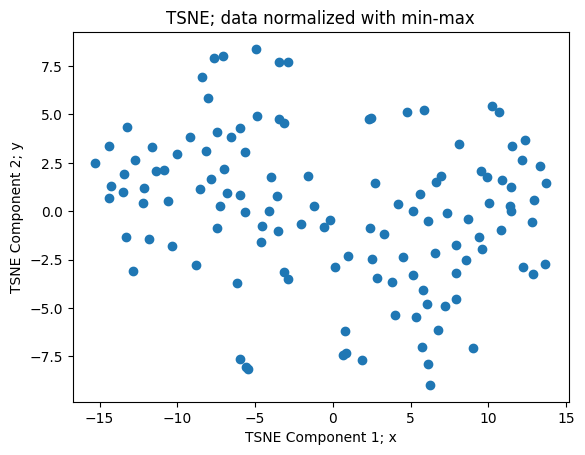

In [376]:
affinities = openTSNE.affinity.Multiscale(
    large.to_numpy(),
    perplexities=20,
    metric="euclidean",
    n_jobs=8,
    random_state=3
)

init = openTSNE.initialization.pca(large.to_numpy(), random_state=42)

X_tsne = openTSNE.TSNE(n_jobs=8).fit(
    affinities=affinities,
    initialization=init
)

print(X_tsne.shape)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], cmap=colors)
ax = plt.gca()
ax.ticklabel_format(useOffset=False)
ax.set_xlabel("TSNE Component 1; x")
ax.set_ylabel("TSNE Component 2; y")
plt.title("TSNE; data normalized with min-max")
plt.savefig('tsne2_plot.png')
plt.show()

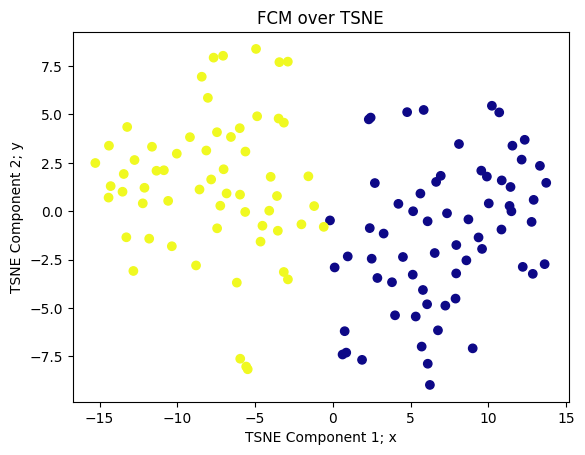

In [377]:
fcm = FCM(data=X_tsne, num_clusters=2)
centers, result, fpc = fcm.fit()

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=result, cmap='plasma')
ax = plt.gca()
ax.ticklabel_format(useOffset=False)
ax.set_xlabel("TSNE Component 1; x")
ax.set_ylabel("TSNE Component 2; y")
plt.title("FCM over TSNE")
plt.savefig('fcm_tsne_final.png')
plt.show()

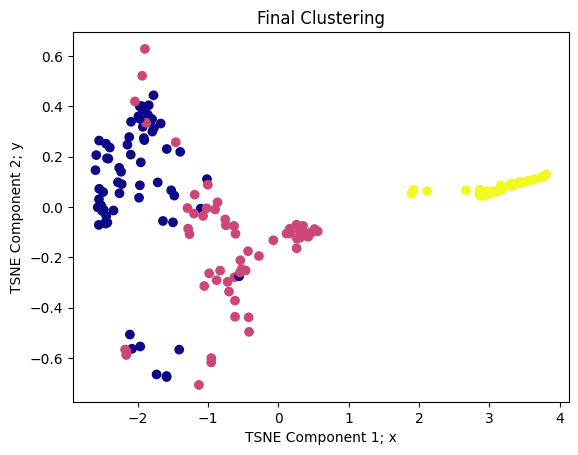

In [378]:
final_result = []
counter, flag = 0, False

temp = small.to_numpy()
for i, row in data.iterrows():
    row = row.to_numpy()

    for j in range(len(temp)):
        if (row == temp[j]).all():
            final_result.append(2)
            flag = True
            break

    if flag:
        flag = False
        continue

    final_result.append(result[counter])
    counter += 1

plt.scatter(X_tsne_later[:, 0], X_tsne_later[:, 1], c=final_result, cmap='plasma')
ax = plt.gca()
ax.ticklabel_format(useOffset=False)
ax.set_xlabel("TSNE Component 1; x")
ax.set_ylabel("TSNE Component 2; y")
plt.title("Final Clustering")
plt.savefig('final_clustering.png')
plt.show()

In [379]:
original.insert(loc=0, column='Label', value=final_result)
original

,Label,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280
0,0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92
1,0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40
2,0,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17
3,0,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45
4,0,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,2,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74
174,2,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56
175,2,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56
176,2,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62


In [380]:
truth = pd.read_csv('../data/ground_truth.csv')
truth

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [381]:
truth = truth['class'].to_numpy()

correct = 0
for i in range(len(truth)):
    if (truth[i]-1) == final_result[i]:
        correct += 1

print(correct/len(truth))

0.9269662921348315
